# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 5</p> 
# <center> (Finally the final homework this semester, yay!)
## <p style="text-align: center;">Total points: 55 </p>
## <p style="text-align: center;">Due: Monday, **Nov 29th** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

**Name: Rohitashwa Chakraborty  <br>
EID: rc47878 <br>**

**Name: Sahitya Sundar Raj Vijayanagar <br>
EID: sv25849 <br>**

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Question 1: Ensembles Conceptual (5 pts)
Briefly describe the concepts of Gradient Boosting in your own words. How does it differ from Adaboost?

## Answer:
Bleh

### AdaBoost:

- Lots of weak learners created. These weak learners are _"stumps"_ i.e: they just have one parent node and 2 children (depth = 1).
- Unlike random forest where the final result is an average of all the individual trees in the forest, the stumps of Ada-boost have different weights associated with them. The net result is a _Weighted Average_ of all the individual trees/stumps 
- Each successive tree/stump is created on top of the previous stump (which is unlike random forest, where each trees grows independently).
- Weights are directly proportional to the log-odds of classification or the gini-index of the split.

# Question 2: SVM (25 pts)
Support Vector Machine (SVM) is a supervised machine learning algorithm that can be used for both classification and regression. In this problem, you will be playing with SVM on the sklearn wine dataset to explore the impacts of different parameters.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score

# load data
wine = datasets.load_wine()
# only take the first two features
X = wine.data[:, :2]
y = wine.target

In [7]:
def plot_model(X, y, svc, kernel='linear', gamma = 0.5):
# You don't need to implement this function, this has been implemented and is just for plotting the trained model.

# Input: 
#  - X: data features 
#  - y: the labels
#  - svc: the trained svm.SVC model
#  - kernel: specified kernel type, default value is 'linear'

    x0_min, x0_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x1_min, x1_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = (x0_max / x0_min)/100
    xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))

    plt.subplot(1, 1, 1)
    y_pred = svc.predict(np.c_[xx0.ravel(), xx1.ravel()])
    y_pred = y_pred.reshape(xx0.shape)
    plt.contourf(xx0, xx1, y_pred, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.xlim(xx0.min(), xx0.max())
    plt.title('SVC with {kernel} kernel; gamma {gamma}'.format(kernel = kernel, gamma = gamma))
    plt.show()


**a) (5 pts)** Implement the `train_model()` function. This function takes as input:

- X (the features)
- y (the labels)
- kernel (the specified kernel type, default value is `'linear'`)
- C (the penalty parameter, default value is 1
)
- gamma (the kernel coefficient, default value is 0.5). 

The `train_model()` function should fit a [svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) model and return the trained model. After implementing `train_model()`, use the `plot_model()` function provided below to plot the results of your model.


## Answer:

In [8]:
def train_model(X, y, kernel='linear', C=1, gamma=0.5):
    svc = svm.SVC(C= C, kernel= kernel, gamma= gamma)
    svc.fit(X, y)
    return svc

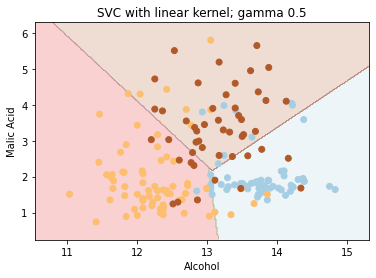

In [9]:
kernel='linear'
gamma = 0.5
svc = train_model(X, y, kernel= kernel, C=1, gamma= gamma)
plot_model(X, y, svc, kernel= kernel, gamma = gamma)

**b) (10 pts)** The `kernel` parameter decides what form the input data will be transformed into, and may affect how your trained SVM model performs. In (a), the default value for `kernel` is `'linear'`, now re-train your svm model as you did in (a), but this time, use `'rbf'` as the `kernel`, while keeping `C=1, gamma=0.5` still. Use the provided `plot_model()` function to plot the results of your model. What do you observe?

## Answer:

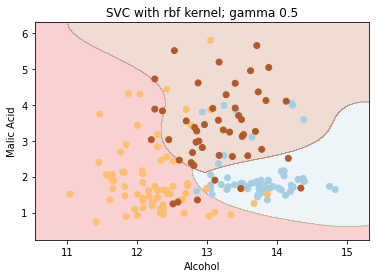

In [10]:
kernel = 'rbf'
svc = train_model(X, y, kernel= kernel)
plot_model(X, y, svc, kernel= kernel)

### Observation:
- The decision boundary created by the **linear kernel** is a straight line, while **rbf kernel** generates non-linear decision boundary
- In this case, since the data points are not separated in a linear pattern, the rbf outperforms linear kernel


**c) (10 pts)** The `'gamma'` is a hyper-parameter needed for `'rbf'` kernel, which specifies the width of the Gaussian Kernel. Now experiment with different gamma values `[0.5, 1, 10, 100]`, use `'rbf'` as the `kernel`, while keeping `C=1`. Train your SVM and use the provided `plot_model()` function to plot the results of your model. What do you observe from the plot as gamma increases? 

## Answer

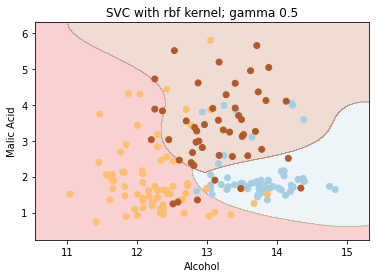

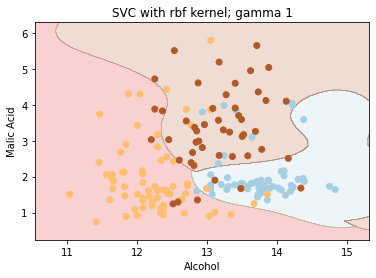

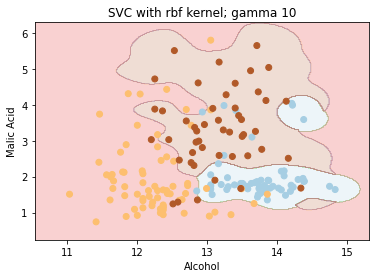

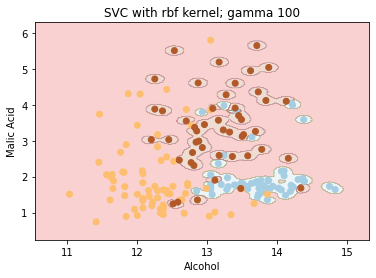

In [11]:
kernel = 'rbf'

for idx, gamma in enumerate([0.5, 1, 10, 100]):
    svc = train_model(X, y, kernel= kernel, gamma = gamma)
    plot_model(X, y, svc, kernel= kernel, gamma= gamma)

### Observation:
- As Gamma Increases, the decision boundaries become increasingly non - linear, and the model starts to overfit the data.
- At very high Gamma, the 'regions' break down to create pockets. (Similar to a nearest neighbour classifier)
In conclusion, Gamma is inversely proportional to the bias of the SVC model.

This is not surprising since, per the [sklearn documentation](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#:~:text=The%20gamma%20parameters%20can%20be%20seen%20as%20the%20inverse%20of%20the%20radius%20of%20influence%20of%20samples%20selected%20by%20the%20model%20as%20support%20vectors.), 
> _The gamma parameters can be seen as the **inverse of the radius of influence** of samples selected by the model as support vectors._

# Question 3: Ensemble methods for classification (25 pts)

In this question, we will compare the performances of different ensemble methods for classification: Bagging, AdaBoost, GradientBoosting. 

The dataset used is [Spam Classification Data](https://archive.ics.uci.edu/ml/datasets/Spambase), which you can load from `spam_uci.csv` file. The last column represents the target label, where 1 means spam and 0 otherwise. You can use the provided codes to load the data and split training/test sets.

In [161]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

data = pd.read_csv('spam_uci.csv', index_col=0)
print(data.shape)

X = data.iloc[:, :56]
y = data.iloc[:, 57]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

(4601, 58)


**a) (5 pts)** Fit a [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) with `random_state=10`,  and a [Logistic Regression Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) with `random_state=10` and `solver="newton-cg"` for the spam classification problem. For each classifier, report the [accuracy_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) on the test data. 
**Note**: Before computing roc_auc_score, you will need [`predict_proba(X_test)[:, 1]`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba) to obtain the predicted target scores first.


### Answer:

In [162]:
def logistic_regression(X_train, X_test, y_train, y_test):
    model_lr = LogisticRegression(random_state=10, solver="newton-cg").fit(X_train, y_train)
    y_pred_train_lr = model_lr.predict(X_train) 
    y_pred_test_lr = model_lr.predict(X_test)
    y_proba_train_lr = model_lr.predict_proba(X_train)[:,1]
    y_proba_test_lr = model_lr.predict_proba(X_test)[:,1]
    accuracy_test_lr = accuracy_score(y_test, y_pred_test_lr)
    accuracy_train_lr = accuracy_score(y_train, y_pred_train_lr)
    roc_auc_test_lr = roc_auc_score(y_test, y_proba_test_lr, average=None)
    roc_auc_train_lr = roc_auc_score(y_train, y_proba_train_lr, average=None)
    return accuracy_test_lr, accuracy_train_lr, roc_auc_test_lr, roc_auc_train_lr



def decision_tree(X_train, X_test, y_train, y_test):
    model_dt = DecisionTreeClassifier(random_state=10).fit(X_train, y_train)
    y_pred_train_dt = model_dt.predict(X_train) 
    y_pred_test_dt = model_dt.predict(X_test)
    y_proba_train_dt = model_dt.predict_proba(X_train)[:,1]
    y_proba_test_dt = model_dt.predict_proba(X_test)[:,1]
    accuracy_test_dt = accuracy_score(y_test, y_pred_test_dt)
    accuracy_train_dt = accuracy_score(y_train, y_pred_train_dt)
    roc_auc_test_dt = roc_auc_score(y_test, y_proba_test_dt, average=None)
    roc_auc_train_dt = roc_auc_score(y_train, y_proba_train_dt, average=None)
    return accuracy_test_dt, accuracy_train_dt, roc_auc_test_dt, roc_auc_train_dt


In [163]:
accuracy_test_lr, accuracy_train_lr, roc_auc_test_lr, roc_auc_train_lr = logistic_regression(X_train, X_test, y_train, y_test)

print('LOGISTIC REGRESSION:\n')
print(f'Test accuracy:{accuracy_test_lr}')
print(f'ROC AUC Test: {roc_auc_test_lr}\n')
print(f'Train accuracy:{accuracy_train_lr}')
print(f'ROC AUC Train: {roc_auc_train_lr}')

LOGISTIC REGRESSION:

Test accuracy:0.9315339038841343
ROC AUC Test: 0.9734682742610166

Train accuracy:0.9260220635950681
ROC AUC Train: 0.9741398438753142


In [164]:
accuracy_test_dt, accuracy_train_dt, roc_auc_test_dt, roc_auc_train_dt = decision_tree(X_train, X_test, y_train, y_test)

print('DECISION TREE CLASSIFIER:\n')
print(f'Test accuracy:{accuracy_test_dt}')
print(f'ROC AUC Test: {roc_auc_test_dt}\n')
print(f'Train accuracy:{accuracy_train_dt}')
print(f'ROC AUC Train: {roc_auc_train_dt}')

DECISION TREE CLASSIFIER:

Test accuracy:0.9098090849242922
ROC AUC Test: 0.9040453749567611

Train accuracy:0.9993510707332901
ROC AUC Train: 0.9999935393608869


**b) (5 pts)** For **each** classifier in (a), use [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) to create an ensemble of 50 classifiers (i.e `n_estimators=50`) with `random_state=10`, report the accuracy_score and roc_auc_score on the test data. Compare the scores with what you obtained in (a), briefly describe the impact of Bagging on both classifiers.


### Answer

In [10]:
def bagging(model, X_train, X_test, y_train, y_test):
    model_bg = BaggingClassifier(base_estimator=model,
                            n_estimators=50, random_state=10).fit(X_train, y_train)
    y_pred_test_bg = model_bg.predict(X_test)
    y_pred_train_bg = model_bg.predict(X_train)
    y_proba_train_bg = model_bg.predict_proba(X_train)[:,1]
    y_proba_test_bg = model_bg.predict_proba(X_test)[:,1]
    accuracy_test_bg = accuracy_score(y_test, y_pred_test_bg)
    accuracy_train_bg = accuracy_score(y_train, y_pred_train_bg)
    roc_auc_test_bg = roc_auc_score(y_test, y_proba_test_bg, average=None)
    roc_auc_train_bg = roc_auc_score(y_train, y_proba_train_bg, average=None)
    return accuracy_test_bg, accuracy_train_bg, roc_auc_test_bg, roc_auc_train_bg
    

In [11]:
accuracy_test_bglr, accuracy_train_bglr, roc_auc_test_bglr, roc_auc_train_bglr = bagging(LogisticRegression(), X_train, X_test, y_train, y_test)

print('BAGGING WITH LOGISTIC REGRESSION:\n')
print(f'Test accuracy:{accuracy_test_bglr}')
print(f'ROC AUC Test: {roc_auc_test_bglr}\n')
print(f'Train accuracy:{accuracy_train_bglr}')
print(f'ROC AUC Train: {roc_auc_train_bglr}')

BAGGING WITH LOGISTIC REGRESSION:

Test accuracy:0.9315339038841343
ROC AUC Test: 0.9755990143321245

Train accuracy:0.926995457495133
ROC AUC Train: 0.9739585004188277


In [12]:
accuracy_test_bgdt, accuracy_train_bgdt, roc_auc_test_bgdt, roc_auc_train_bgdt = bagging(DecisionTreeClassifier(), X_train, X_test, y_train, y_test)

print('BAGGING WITH DECISION TREE CLASSIFIER:\n')
print(f'Test accuracy:{accuracy_test_bgdt}')
print(f'ROC AUC Test: {roc_auc_test_bgdt}\n')
print(f'Train accuracy:{accuracy_train_bgdt}')
print(f'ROC AUC Train: {roc_auc_train_bgdt}')

BAGGING WITH DECISION TREE CLASSIFIER:

Test accuracy:0.9368005266622779
ROC AUC Test: 0.9796839729119637

Train accuracy:0.9990266060999351
ROC AUC Train: 0.9997790015861983


***
**!!!OBSERVATION?!!!**
***


**c) (5 pts)** Fit a [Random Forest Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) for the spam classification problem. Use [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to find the best combination of hyperparameters from `{"n_estimators": [10, 100, 500], "criterion": ['gini', 'entropy'], "random_state": [42]}`. As what you did in (a), report the accuracy_score and roc_auc_score on the test data. 


### Answer

In [14]:
parameters = {"n_estimators": [10, 100, 500], "criterion": ['gini', 'entropy'], "random_state": [42]}
model_rf = RandomForestClassifier()
model_rf_gs = GridSearchCV(model_rf, parameters)
model_rf_gs.fit(X_train, y_train)

print('Train R^2 Score : %.3f'%model_rf_gs.best_estimator_.score(X_train, y_train))
print('Test R^2 Score : %.3f'%model_rf_gs.best_estimator_.score(X_test, y_test))
print('Best R^2 Score Through Grid Search : %.3f'%model_rf_gs.best_score_)
print('Best Parameters : ',model_rf_gs.best_params_)

def rf_classifier(X_train, y_train, X_test, y_test, model):
    model_rf_best = RandomForestClassifier(criterion=model['criterion'], 
                                           n_estimators=model['n_estimators'], 
                                           random_state=model['random_state'])
    model_rf_best.fit(X_train, y_train)
    y_pred_test_rf = model_rf_best.predict(X_test)
    y_pred_train_rf = model_rf_best.predict(X_train)
    y_proba_train_rf = model_rf_best.predict_proba(X_train)[:,1]
    y_proba_test_rf = model_rf_best.predict_proba(X_test)[:,1]
    accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)
    accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
    roc_auc_test_rf = roc_auc_score(y_test, y_proba_test_rf, average=None)
    roc_auc_train_rf = roc_auc_score(y_train, y_proba_train_rf, average=None)
    return accuracy_test_rf, accuracy_train_rf, roc_auc_test_rf, roc_auc_train_rf

Train R^2 Score : 0.999
Test R^2 Score : 0.955
Best R^2 Score Through Grid Search : 0.949
Best Parameters :  {'criterion': 'gini', 'n_estimators': 500, 'random_state': 42}


In [29]:
accuracy_test_rf, accuracy_train_rf, roc_auc_test_rf, roc_auc_train_rf = rf_classifier(X_train, y_train, X_test, y_test, model_rf_gs.best_params_)

In [34]:
print(f'RANDOM FOREST CLASSIFIER with hyper-paramaters:\n{model_rf_gs.best_params_}\n')
print(f'Test accuracy:{accuracy_test_rf}')
print(f'ROC AUC Test: {roc_auc_test_rf}\n')
print(f'Train accuracy:{accuracy_train_rf}')
print(f'ROC AUC Train: {roc_auc_train_rf}')

RANDOM FOREST CLASSIFIER with hyper-paramaters:
{'criterion': 'gini', 'n_estimators': 500, 'random_state': 42}

Test accuracy:0.9552337063857801
ROC AUC Test: 0.9891234188838844

Train accuracy:0.9993510707332901
ROC AUC Train: 0.9997573918622681



**d) (6 pts)** Fit a [GradientBoosting Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html), and an [AdaBoost Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) for the spam classification problem. Use GridSearchCV to find the best combination of hyperparameters for each classifier: 
- For GradientBoosting, find the best combination from `{"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "max_depth":[3, 5, 10], "subsample":[0.5, 0.7, 1.0], "random_state":[42]}`;
- For AdaBoost, find the best combination from `{"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "random_state":[42]}`. 

Report the accuracy_score and roc_auc_score on the test data for each classifier. The GridSearchCV may take some time, especially for GradientBoostingClassifier.

### Answer

In [24]:
### Gradient Boosting

parameters = {"n_estimators":[10, 100, 500], 
              "learning_rate":[0.01, 0.1, 0.5], 
              "max_depth":[3, 5, 10], 
              "subsample":[0.5, 0.7, 1.0],
              "random_state":[42]}
model_gb = GradientBoostingClassifier()
model_gb_gs = GridSearchCV(model_gb, parameters)
model_gb_gs.fit(X_train, y_train)

print('Train R^2 Score : %.3f'%model_gb_gs.best_estimator_.score(X_train, y_train))
print('Test R^2 Score : %.3f'%model_gb_gs.best_estimator_.score(X_test, y_test))
print('Best R^2 Score Through Grid Search : %.3f'%model_gb_gs.best_score_)
print('Best Parameters : ',model_gb_gs.best_params_)

model = model_gb_gs.best_params_

def gb_classifier(X_train, y_train, X_test, y_test, model):
    model_gb_best = GradientBoostingClassifier(n_estimators=model['n_estimators'], 
                                               learning_rate=model['learning_rate'],
                                               max_depth=model['max_depth'],
                                               subsample=model['subsample'],
                                               random_state=model['random_state'])
    model_gb_best.fit(X_train, y_train)
    y_pred_test_gb = model_gb_best.predict(X_test)
    y_pred_train_gb = model_gb_best.predict(X_train)
    y_proba_train_gb = model_gb_best.predict_proba(X_train)[:,1]
    y_proba_test_gb = model_gb_best.predict_proba(X_test)[:,1]
    accuracy_test_gb = accuracy_score(y_test, y_pred_test_gb)
    accuracy_train_gb = accuracy_score(y_train, y_pred_train_gb)
    roc_auc_test_gb = roc_auc_score(y_test, y_proba_test_gb, average=None)
    roc_auc_train_gb = roc_auc_score(y_train, y_proba_train_gb, average=None)
    return accuracy_test_gb, accuracy_train_gb, roc_auc_test_gb, roc_auc_train_gb

Train R^2 Score : 0.994
Test R^2 Score : 0.955
Best R^2 Score Through Grid Search : 0.950
Best Parameters :  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'random_state': 42, 'subsample': 1.0}


In [25]:
accuracy_test_gb, accuracy_train_gb, roc_auc_test_gb, roc_auc_train_gb = gb_classifier(X_train, y_train, X_test, y_test, model_gb_gs.best_params_)

In [33]:
print(f'GRADIENT BOOSTING CLASSIFIER with hyper-paramaters:\n{model_gb_gs.best_params_}\n')
print(f'Test accuracy:{accuracy_test_gb}')
print(f'ROC AUC Test: {roc_auc_test_gb}\n')
print(f'Train accuracy:{accuracy_train_gb}')
print(f'ROC AUC Train: {roc_auc_train_gb}')

GRADIENT BOOSTING CLASSIFIER with hyper-paramaters:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'random_state': 42, 'subsample': 1.0}

Test accuracy:0.9552337063857801
ROC AUC Test: 0.9889094533537314

Train accuracy:0.9935107073329007
ROC AUC Train: 0.9993844570389778


In [68]:
### Ada-Boost

parameters = {"n_estimators":[10, 100, 500], 
              "learning_rate":[0.01, 0.1, 0.5], 
              "random_state":[42]}
model_ab = AdaBoostClassifier()
model_ab_gs = GridSearchCV(model_ab, parameters)
model_ab_gs.fit(X_train, y_train)

print('Train R^2 Score : %.3f'%model_ab_gs.best_estimator_.score(X_train, y_train))
print('Test R^2 Score : %.3f'%model_ab_gs.best_estimator_.score(X_test, y_test))
print('Best R^2 Score Through Grid Search : %.3f'%model_ab_gs.best_score_)
print('Best Parameters : ',model_ab_gs.best_params_)

def ab_classifier(X_train, y_train, X_test, y_test, model):
    model_ab_best = AdaBoostClassifier(n_estimators=model['n_estimators'], 
                                               learning_rate=model['learning_rate'],
                                               random_state=model['random_state'])
    model_ab_best.fit(X_train, y_train)
    y_pred_test_ab = model_ab_best.predict(X_test)
    y_pred_train_ab = model_ab_best.predict(X_train)
    y_proba_train_ab = model_ab_best.predict_proba(X_train)[:,1]
    y_proba_test_ab = model_ab_best.predict_proba(X_test)[:,1]
    accuracy_test_ab = accuracy_score(y_test, y_pred_test_ab)
    accuracy_train_ab = accuracy_score(y_train, y_pred_train_ab)
    roc_auc_test_ab = roc_auc_score(y_test, y_proba_test_ab, average=None)
    roc_auc_train_ab = roc_auc_score(y_train, y_proba_train_ab, average=None)
    return accuracy_test_ab, accuracy_train_ab, roc_auc_test_ab, roc_auc_train_ab

Train R^2 Score : 0.953
Test R^2 Score : 0.951
Best R^2 Score Through Grid Search : 0.943
Best Parameters :  {'learning_rate': 0.1, 'n_estimators': 500, 'random_state': 42}


In [69]:
accuracy_test_ab, accuracy_train_ab, roc_auc_test_ab, roc_auc_train_ab = ab_classifier(X_train, y_train, X_test, y_test, model_ab_gs.best_params_)

In [70]:
print(f'ADA-BOOSTING CLASSIFIER with hyper-paramaters:\n{model_ab_gs.best_params_}\n')
print(f'Test accuracy:{accuracy_test_ab}')
print(f'ROC AUC Test: {roc_auc_test_ab}\n')
print(f'Train accuracy:{accuracy_train_ab}')
print(f'ROC AUC Train: {roc_auc_train_ab}')

ADA-BOOSTING CLASSIFIER with hyper-paramaters:
{'learning_rate': 0.1, 'n_estimators': 500, 'random_state': 42}

Test accuracy:0.9512837393021725
ROC AUC Test: 0.9858836241481498

Train accuracy:0.9532770927968851
ROC AUC Train: 0.9918874422998093





**e) (4 pts)** In (c) and (d), you have obtained the best combination of hyperparameters respectively for Random Forest Classifier, Gradient Boosting Classifier and AdaBoost Classifier. 

Please use the best hyperparameters to initialize your classifiers, train your model, compute the accuracy_score and roc_auc_score on the test data, and plot the `accuracy_scores` of the three classifiers vs `n_estimators= [10, 100, 500]` in one plot, and plot the `roc_auc_scores` of the three classifiers vs `n_estimators= [10, 100, 500]` in another plot. That is, keep all other hyperparameters (except for `n_estimators`) as the best hyperparameters you obtained in (c) and (d), plot how the accuracy_score and roc_auc_score changes as you change the number of estimators (`n_estimators`).


### Answer

In [71]:
print(model_rf_gs.best_params_,'\n',model_gb_gs.best_params_,'\n',model_ab_gs.best_params_)

{'criterion': 'gini', 'n_estimators': 500, 'random_state': 42} 
 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'random_state': 42, 'subsample': 1.0} 
 {'learning_rate': 0.1, 'n_estimators': 500, 'random_state': 42}


In [72]:
n_estimators = [10, 100, 500]
test_acc_rf, test_acc_gb, test_acc_ab = [[0]*len(n_estimators) for _ in range(len(n_estimators))]
test_roc_rf, test_roc_gb, test_roc_ab = [[0]*len(n_estimators) for _ in range(len(n_estimators))]

for i in range(len(n_estimators)):
    model_rf_gs.best_params_['n_estimators'] = n_estimators[i]
    test_acc_rf[i] = rf_classifier(X_train, y_train, X_test, y_test, model_rf_gs.best_params_)[0]
    test_roc_rf[i] = rf_classifier(X_train, y_train, X_test, y_test, model_rf_gs.best_params_)[2]
    
    model_gb_gs.best_params_['n_estimators'] = n_estimators[i]
    test_acc_gb[i] = gb_classifier(X_train, y_train, X_test, y_test, model_gb_gs.best_params_)[0]
    test_roc_gb[i] = gb_classifier(X_train, y_train, X_test, y_test, model_gb_gs.best_params_)[2]
    
    model_ab_gs.best_params_['n_estimators'] = n_estimators[i]
    test_acc_ab[i] = ab_classifier(X_train, y_train, X_test, y_test, model_ab_gs.best_params_)[0]
    test_roc_ab[i] = ab_classifier(X_train, y_train, X_test, y_test, model_ab_gs.best_params_)[2]  

In [96]:
accuracy_results = pd.DataFrame([test_acc_rf, test_acc_gb, test_acc_ab], 
             columns=['n_estimators=10','n_estimators=100','n_estimators=500'], 
             index = ['Random Forest Classifier','Gradient Boost Classifier','AdaBoost Classifier'])
accuracy_results = accuracy_results.rename_axis(columns="ACCURACY SCORES")
accuracy_results

ACCURACY SCORES,n_estimators=10,n_estimators=100,n_estimators=500
Random Forest Classifier,0.945359,0.956550,0.955234
Gradient Boost Classifier,0.895326,0.950625,0.955234
AdaBoost Classifier,0.844635,0.940092,0.951284


In [97]:
roc_auc_results = pd.DataFrame([test_roc_rf, test_roc_gb, test_roc_ab], 
             columns=['n_estimators=10','n_estimators=100','n_estimators=500'], 
             index = ['Random Forest Classifier','Gradient Boost Classifier','AdaBoost Classifier'])
roc_auc_results = roc_auc_results.rename_axis(columns="ROC AUC SCORES")
roc_auc_results

ROC AUC SCORES,n_estimators=10,n_estimators=100,n_estimators=500
Random Forest Classifier,0.981291,0.988330,0.989123
Gradient Boost Classifier,0.954392,0.987073,0.988909
AdaBoost Classifier,0.936802,0.983828,0.985884


Text(0, 0.5, 'ROC_AUC_Scores')

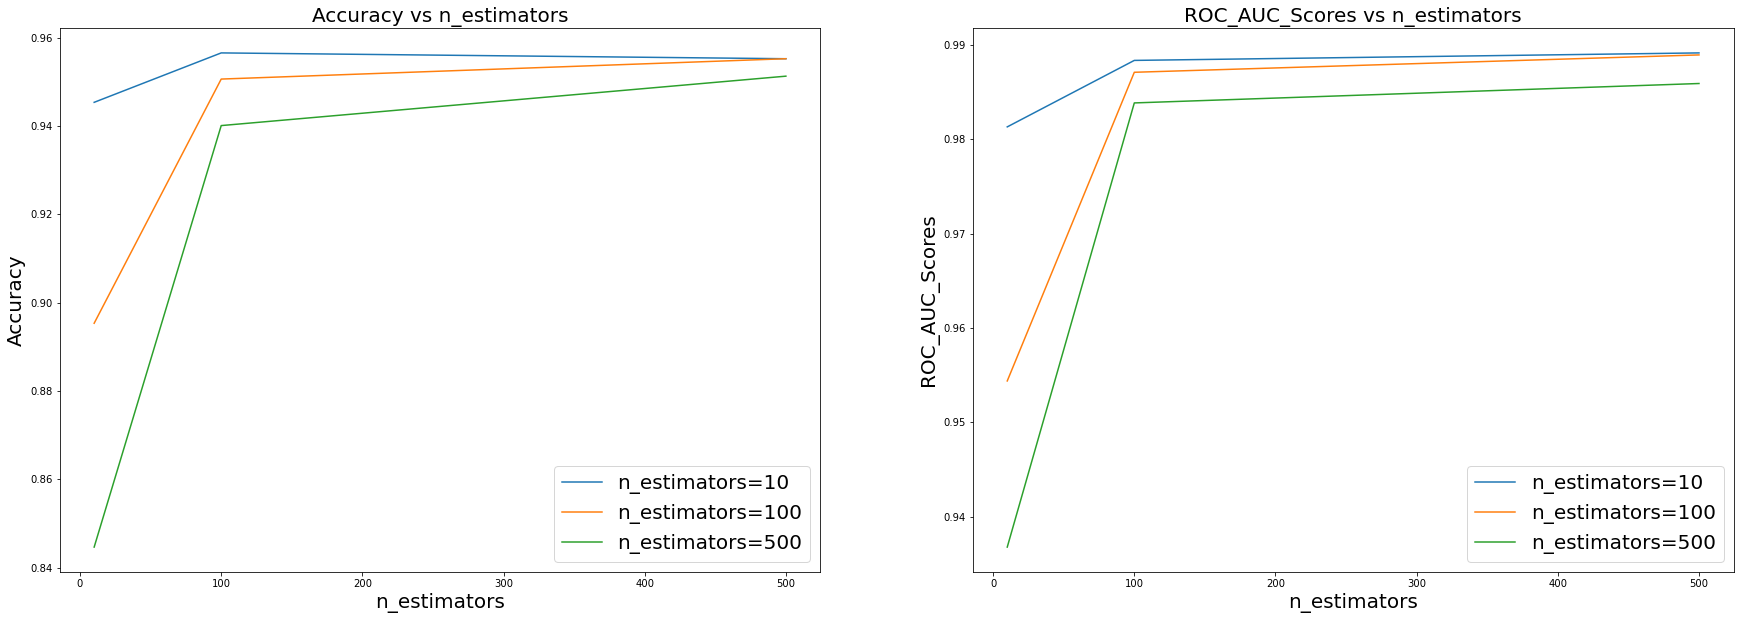

In [125]:
fig, ax = plt.subplots(1,2, sharex= True, sharey=False)
fig.set_size_inches(30, 10,  forward=True)

ax[0].plot(n_estimators,accuracy_results.T)
ax[0].set_title('Accuracy vs n_estimators', fontsize=20)
ax[0].legend(accuracy_results.columns, prop={'size': 20})
ax[0].set_xlabel('n_estimators', fontsize=20)
ax[0].set_ylabel('Accuracy', fontsize=20)

ax[1].plot(n_estimators,roc_auc_results.T)
ax[1].set_title('ROC_AUC_Scores vs n_estimators', fontsize=20)
ax[1].legend(roc_auc_results.columns, prop={'size': 20})
ax[1].set_xlabel('n_estimators', fontsize=20)
ax[1].set_ylabel('ROC_AUC_Scores', fontsize=20)

## END-OF-CODE